# 1. INTRODUCTION

======================================================================================================

$$NAMA : Fajar Dawud
$$



<!-- Project ini berisi hasil analisis data yang saya olah dengan tujuan menghasilkan sebuah inovasi baru berdasarkan riset atau data yang ada. -->

======================================================================================================

- Topik Permasalahan:

Pemberian saran kepada client untuk melakukan improvement terkait kondisi kesehatan. 


- Latar Belakang:

Pola hidup yang kurang sehat merupakan topik yang menjadi perhatian dalam beberapa waktu terakhir, terutama seiring meningkatnya prevalensi penyakit kronis seperti diabetes, obesitas, dan hipertensi. Pola hidup sehat seseorang dapat dipengaruhi oleh pola makan, aktivitas harian, dan jam tidur yang cukup. Oleh karena itu, penting untuk menganalisis dan memahami pola perilaku individu yang dapat mempengaruhi kualitas hidup serta kesehatan secara keseluruhan.


- Tujuan:

Menyajikan hasil analisis kepada client sebagai dasar pemberian saran untuk meningkatkan kondisi kesehatan.


- Problem statement:

Penyakit kronis yang dipengaruhi oleh gaya hidup yang kurang sehat semakin meningkat. Namun, dari hasil analisa yang ada saya bisa memberi saran dan masukan untuk meningkatkan kesadaran kesehatan pada client. 


- Permintaan Client:

Client meminta solusi efektif yang dapat membantu mengurangi risiko penyakit kronis dengan menggabungkan riset tentang faktor-faktor penyebabnya berdasarkan hasil analisis yang ada.

Dibawah ini merupakan penjabaran masalah yang akan saya sajikan dengan visualisasi


1. Berikan distribusi data terkait usia.

2. Apa saja jenis olahraga yang sering dilakukan?

3. Bagaimana hubungan antara durasi tidur dan kalori yang dibakar?

4. berapa kalori yang dibakar berdasarkan jenis olahraga?

5. Berapa banyak pengguna yang memiliki BMI di atas batas normal?

6. Berikan Distribusi presentase perkokok dengan health condition sesuai data

7. berapa rata-rata durasi tidur perhari dari setiap orang?

8. Berapa rata-rata daily step orang yang kondisi kesehatan nya normal?

9. Faktor gaya hidup apa saja yang berhubungan dengan meningkatnya resiko penyakit diabetes?

=====================================================================================================================================================================================================================================================

# 2. IMPORT LIBRARY

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway
import seaborn as sns
from scipy.stats import pearsonr

# 3. Data Loading

In [7]:
#Load data yg sudah di download
df = pd.read_csv('health_fitness_dataset.csv')
df

,participant_id,date,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,...,stress_level,daily_steps,hydration_level,bmi,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,health_condition,smoking_status,fitness_level
0,1,2024-01-01,56,F,165.3,53.7,Dancing,41,Low,3.3,...,3,7128,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.04
1,1,2024-01-04,56,F,165.3,53.9,Swimming,28,Low,2.9,...,7,7925,1.8,19.6,69.5,110.7,72.9,NaN,Never,0.07
2,1,2024-01-05,56,F,165.3,54.2,Swimming,21,Medium,2.6,...,7,7557,2.7,19.6,69.5,110.7,72.9,NaN,Never,0.09
3,1,2024-01-07,56,F,165.3,54.4,Weight Training,99,Medium,10.7,...,8,11120,2.6,19.6,69.5,110.7,72.9,NaN,Never,0.21
4,1,2024-01-09,56,F,165.3,54.7,Swimming,100,Medium,12.7,...,1,5406,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687696,3000,2024-12-19,38,F,165.7,112.9,Basketball,44,Medium,13.2,...,6,6911,1.9,20.7,66.5,127.0,75.5,NaN,Never,17.13
687697,3000,2024-12-20,38,F,165.7,113.1,Basketball,25,Low,6.3,...,6,8932,2.6,20.7,66.5,127.0,75.5,NaN,Never,17.16
687698,3000,2024-12-21,38,F,165.7,113.4,Yoga,97,Low,9.1,...,8,8864,1.8,20.7,66.5,127.0,75.5,NaN,Never,17.26
687699,3000,2024-12-22,38,F,165.7,113.6,Basketball,108,Medium,32.6,...,4,7455,2.1,20.7,66.5,127.0,75.5,NaN,Never,17.39


Dataset ini adalah data yang berisi tentang catatan pola hidup orang-orang yang merupakan member di tempat fitness. Mereka setiap hari mengupdate kegiatan harianya, seperti pola tidur, daily steps, jenis olahraga yang dilakukan, dsb. Di dalam data ini tercatat ada 3000 member yang meng-update kegiatan harian nya selama kurang lebih 240 hari per orang. Karena saya hanya perlu data kesehatan nya saja, maka data ini perlu saya bersihkan terlebih dahulu.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687701 entries, 0 to 687700
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   participant_id            687701 non-null  int64  
 1   date                      687701 non-null  object 
 2   age                       687701 non-null  int64  
 3   gender                    687701 non-null  object 
 4   height_cm                 687701 non-null  float64
 5   weight_kg                 687701 non-null  float64
 6   activity_type             687701 non-null  object 
 7   duration_minutes          687701 non-null  int64  
 8   intensity                 687701 non-null  object 
 9   calories_burned           687701 non-null  float64
 10  avg_heart_rate            687701 non-null  int64  
 11  hours_sleep               687701 non-null  float64
 12  stress_level              687701 non-null  int64  
 13  daily_steps               687701 non-null  i

In [9]:
df.isnull().sum()

participant_id                   0
date                             0
age                              0
gender                           0
height_cm                        0
weight_kg                        0
activity_type                    0
duration_minutes                 0
intensity                        0
calories_burned                  0
avg_heart_rate                   0
hours_sleep                      0
stress_level                     0
daily_steps                      0
hydration_level                  0
bmi                              0
resting_heart_rate               0
blood_pressure_systolic          0
blood_pressure_diastolic         0
health_condition            490275
smoking_status                   0
fitness_level                    0
dtype: int64

>INSIGHT:
- Beberapa tipe data sudah sesuai
- Banyak sekali data duplicate yang harus di drop
- Terdapat beberapa kolom yang tidak saya perlukan
- Terdapat missing value yang ada di kolom `health_condition`
- Agar mempermudah proses analisis data, maka saya perlu mengurutkan dari umur yang paling muda

In [10]:
#Supaya data asli tetap ada, maka saya copy data untuk pengolahan dengan cara:
df2 = df.copy()

# 4. DATA CLEANING
- Drop data yang terduplicate

In [11]:
df2 = df2.drop_duplicates(subset=['participant_id'])

In [12]:
df2.columns

Index(['participant_id', 'date', 'age', 'gender', 'height_cm', 'weight_kg',
       'activity_type', 'duration_minutes', 'intensity', 'calories_burned',
       'avg_heart_rate', 'hours_sleep', 'stress_level', 'daily_steps',
       'hydration_level', 'bmi', 'resting_heart_rate',
       'blood_pressure_systolic', 'blood_pressure_diastolic',
       'health_condition', 'smoking_status', 'fitness_level'],
      dtype='object')

- Drop kolom yang tidak terpakai

In [13]:
df2 = df2.drop(['date', 'fitness_level', 'height_cm', 'duration_minutes', 'intensity', 'avg_heart_rate', 'resting_heart_rate',
       'blood_pressure_systolic', 'blood_pressure_diastolic'], axis=1)

- Handle missing value yang ada di kolom health_condition dengan mengisi "Normal".

In [14]:
df2['health_condition'].fillna("Normal", inplace=True)

C:\Users\hp88x\AppData\Local\Temp\ipykernel_13248\1331256758.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['health_condition'].fillna("Normal", inplace=True)


- Mengurutkan data berdasarkan umur supaya mudah mencari persebaran data nya 

In [15]:
df2 = df2.sort_values(by='age')

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 141156 to 447477
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   participant_id    3000 non-null   int64  
 1   age               3000 non-null   int64  
 2   gender            3000 non-null   object 
 3   weight_kg         3000 non-null   float64
 4   activity_type     3000 non-null   object 
 5   calories_burned   3000 non-null   float64
 6   hours_sleep       3000 non-null   float64
 7   stress_level      3000 non-null   int64  
 8   daily_steps       3000 non-null   int64  
 9   hydration_level   3000 non-null   float64
 10  bmi               3000 non-null   float64
 11  health_condition  3000 non-null   object 
 12  smoking_status    3000 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 328.1+ KB


>Menampilkan beberapa baris 

In [17]:
df2.head(30)

,participant_id,age,gender,weight_kg,activity_type,calories_burned,hours_sleep,stress_level,daily_steps,hydration_level,bmi,health_condition,smoking_status
141156,616,18,M,67.1,Dancing,12.1,6.0,10,10070,2.9,24.2,Normal,Current
126718,553,18,F,58.6,Yoga,3.3,8.9,9,7278,3.3,22.2,Hypertension,Never
457382,1996,18,M,73.0,Tennis,17.1,7.7,1,9685,2.1,22.4,Normal,Former
649792,2835,18,F,61.2,Weight Training,7.4,6.7,10,8977,3.0,22.6,Normal,Never
505344,2204,18,M,59.9,Weight Training,9.0,6.1,7,4450,1.8,21.1,Diabetes,Never
505785,2206,18,F,54.0,Tennis,12.4,7.4,5,6362,2.0,22.8,Hypertension,Never
508975,2220,18,Other,87.0,Basketball,27.3,5.8,2,10253,3.0,29.7,Normal,Current
667862,2914,18,F,51.8,Swimming,3.0,6.6,8,6029,2.7,18.8,Normal,Current
668996,2919,18,M,57.0,Cycling,13.0,7.4,10,9618,1.6,19.0,Normal,Never
513992,2242,18,M,81.1,Walking,6.5,5.6,9,4227,2.2,26.1,Asthma,Never


=============================================================== DATA CLEANING TELAH SELESAI ==================================================================

# 5. EXPLORATORY DATA ANALYST (EDA)

- 1. Tunjukkan distribusi data terkait usia.

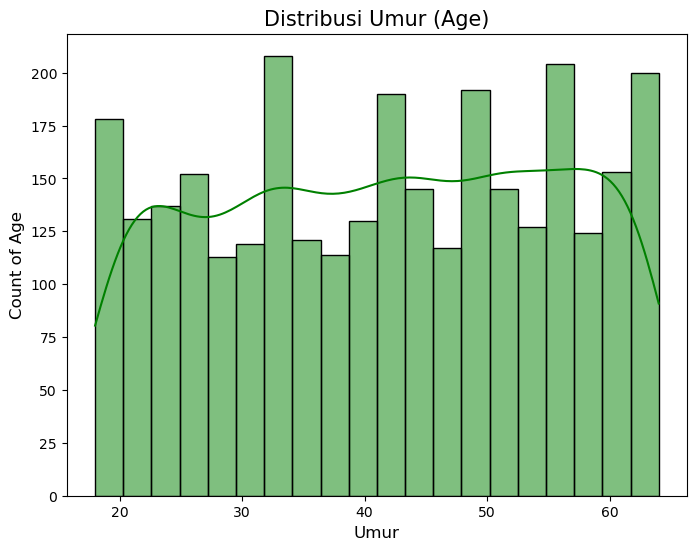

In [18]:
plt.figure(figsize=(8,6))
sns.histplot(df2['age'], bins=20, kde=True, color='green')
plt.title('Distribusi Umur (Age)', fontsize=15)
plt.xlabel('Umur', fontsize=12)
plt.ylabel('Count of Age', fontsize=12)
plt.show()

In [36]:
rata2_usia = df2['age'].mode(1)
print(f"Rata-rata usia:\n", rata2_usia)

Rata-rata usia:
 0    24
1    44
Name: age, dtype: int64


>Insight:
- Rata-rata usia yang tercatat di dalam data yaitu 24 dan 44, yang mana di usia 24 adalah remaja, dan 44 adalah dewasa.

- 2. Apa saja jenis olahraga yang sering dilakukan?

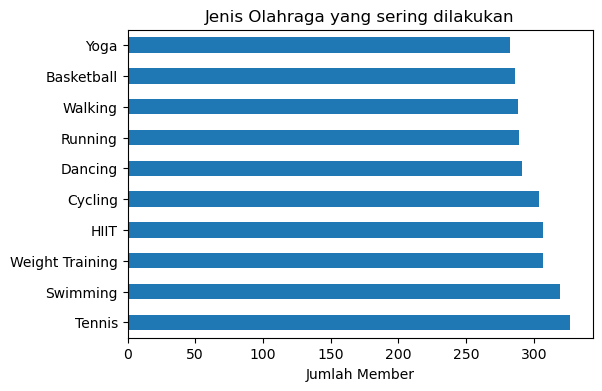

Jenis olahraga yang paling sering dilakukan: Tennis


In [20]:
activity_counts = df2['activity_type'].value_counts()

# Visualisasi dengan bar chart
plt.figure(figsize=(6, 4))
activity_counts.plot(kind='barh')
plt.title('Jenis Olahraga yang sering dilakukan')
plt.xlabel('Jumlah Member')
plt.ylabel('')
plt.show()

print("Jenis olahraga yang paling sering dilakukan:", activity_counts.idxmax())

In [21]:
sliced = df2[df2['age'] >= 30][['age', 'activity_type']].mode()
sliced_2 = df2[df2['age'] <= 30][['age', 'activity_type']].mode()
print(sliced)
print(sliced_2)

   age activity_type
0   44        Tennis
   age activity_type
0   24      Swimming


>INSIGHT:
- Dilihat dari data memang rata-rata umur menunjukkan di angka 40, yang mana kebanyakan orang di usia 40 ke atas lebih memilih olahraga yang ber-intensitas low-medium.
- Renang menjadi jenis olahraga terbanyak dilakukan nomor 2, berdasarkan data, rata2 usia 30 tahun ke bawah, terutama usia 24 tahun memilih olahraga renang

- 3.  Bagaimana hubungan antara durasi tidur dan kalori yang dibakar?



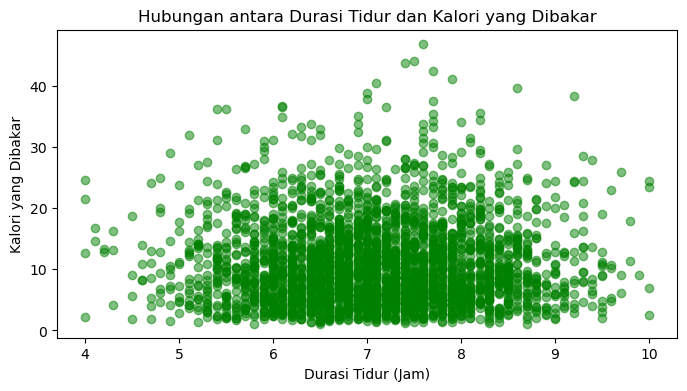

In [22]:
plt.figure(figsize=(8, 4))
plt.scatter(df2['hours_sleep'], df2['calories_burned'], color='green', alpha=0.5)
plt.title('Hubungan antara Durasi Tidur dan Kalori yang Dibakar')
plt.xlabel('Durasi Tidur (Jam)')
plt.ylabel('Kalori yang Dibakar')
plt.show()

In [23]:
korelasi, p_value = stats.pearsonr(df2['hours_sleep'], df2['calories_burned'])

# Menampilkan hasil korelasi
print(f"Korelasi Pearson antara jam tidur dan kalori terbakar: {korelasi}")
print(f"P-value: {p_value}")

Korelasi Pearson antara jam tidur dan kalori terbakar: 0.005711362096378798
P-value: 0.7545113558715685


INSIGHT:
> Semakin lama tidur nya seseorang, tidak mempengaruhi jumlah kalori yang terbakar

> Saat diuji kolerasi juga tidak ada pengaruh apapun terkait jumlah kalori yang terbakar ketika tidur

- 4. berapa kalori yang dibakar berdasarkan jenis olahraga?

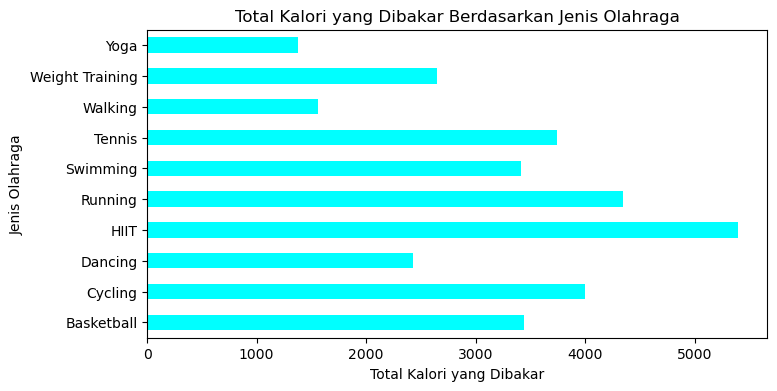

In [24]:
calories_by_activity = df2.groupby('activity_type')['calories_burned'].sum()

# Visualisasi dengan bar chart
plt.figure(figsize=(8, 4))
calories_by_activity.plot(kind='barh', color='aqua')
plt.title('Total Kalori yang Dibakar Berdasarkan Jenis Olahraga')
plt.xlabel('Total Kalori yang Dibakar')
plt.ylabel('Jenis Olahraga')
plt.show()

- Berikut adalah kalori yang terbakar sesuai jenis olahraga nya
- HIIT : High intensity Interval Training adalah olahraga yang paling banyak membakar kalori, di karenakan menggabungkan latihan intensitas tinggi dengan waktu pemulihan.

- 5. Berapa banyak member yang memiliki berat di atas batas normal?



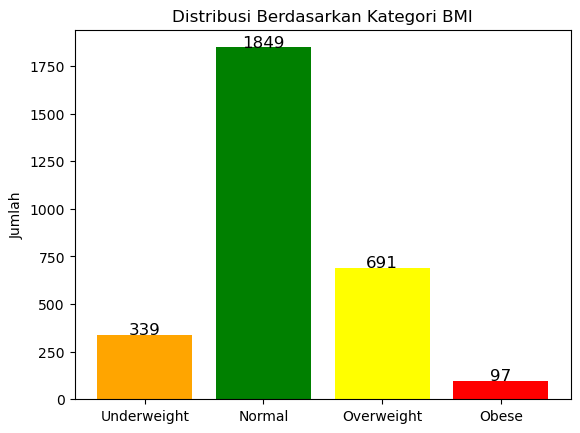

In [38]:
# Hitung jumlah pengguna di tiap kategori BMI
underweight = ((df2['bmi'] < 18.5) & (df2['bmi'] >= 14.2)).sum()  # BMI underweight (<18.5)
normal = ((df2['bmi'] > 18.5) & (df2['bmi'] <= 24.9)).sum()  # BMI normal (18.5-24.9)
overweight = ((df2['bmi'] > 24.9) & (df2['bmi'] <= 29.9)).sum()  # BMI overweight (25-29.9)
obese = (df2['bmi'] >= 30).sum()  # BMI obesitas (>=30)

# Data untuk bar chart
categories = ['Underweight', 'Normal', 'Overweight', 'Obese']
counts = [underweight, normal, overweight, obese]

# Buat bar chart
plt.bar(categories, counts, color=['orange', 'green', 'yellow', 'red'])

# Tambahkan angka di atas bar
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', fontsize=12)

# Judul dan label
plt.title('Distribusi Berdasarkan Kategori BMI')
plt.ylabel('Jumlah')
plt.show()

>INSIGHT: 
Dari hasil visualisasi data, menunjukkan jumlah orang obesitas berjumlah 97

- 6. Berikan Distribusi antara perkokok dengan health condition sesuai data

<Figure size 800x500 with 0 Axes>

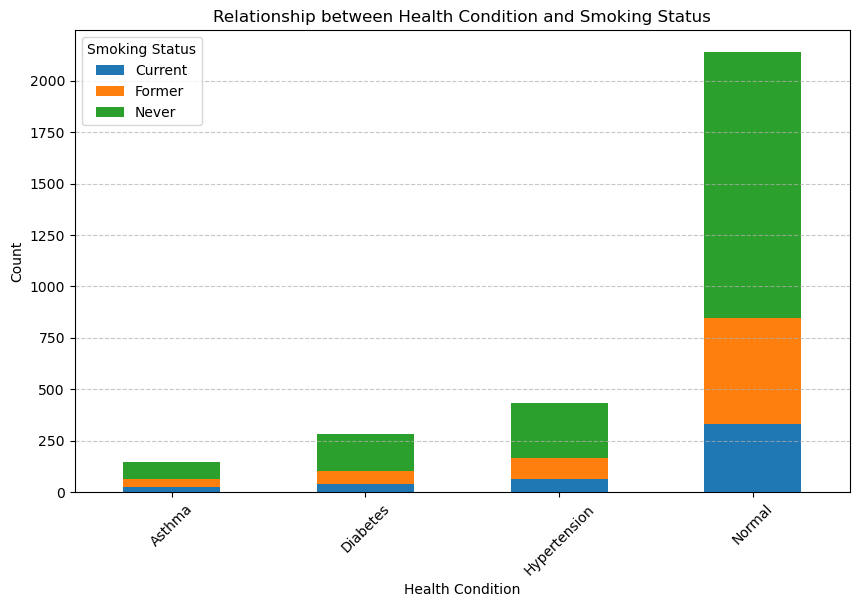

In [26]:
cross_tab = pd.crosstab(df2['health_condition'], df2['smoking_status'])

# Plotting the heatmap
plt.figure(figsize=(8, 5))
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship between Health Condition and Smoking Status')
plt.xlabel('Health Condition')
plt.ylabel('Count')
plt.legend(title="Smoking Status")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

> INSIGHT:
Dilihat dari bar chart diatas, orang yang tidak merokok jauh lebih banyak daripada perokok

- 7. berapa rata-rata durasi tidur perhari dari setiap orang?


>Tujuan: Mengukur nilai rata-rata durasi tidur yang dilaporkan oleh semua pengguna setiap harinya.

In [27]:
mean_sleep = df2['hours_sleep'].mean()
median_sleep = df2['hours_sleep'].median()
skewness= df2['hours_sleep'].skew()

# Menampilkan hasil
print(f"Rata-rata durasi tidur: {mean_sleep} jam")
print(f"Median durasi tidur: {median_sleep} jam")
print(f"skew durasi tidur: {skewness}")

Rata-rata durasi tidur: 7.0943000000000005 jam
Median durasi tidur: 7.1 jam
skew durasi tidur: -0.011522040473759244


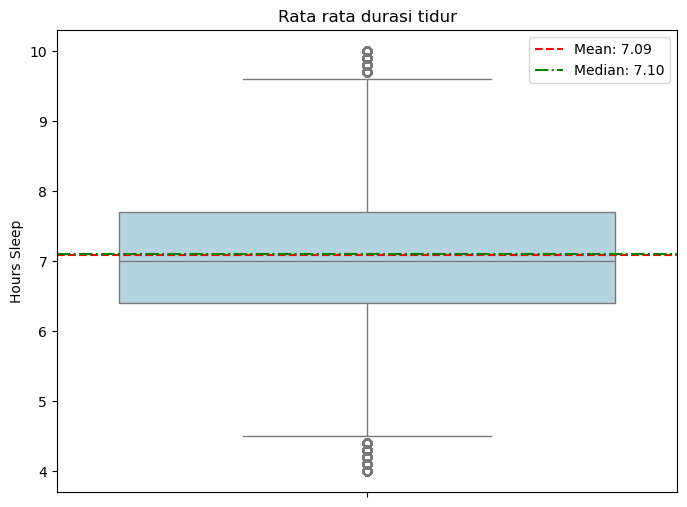

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["hours_sleep"], color="lightblue")

# Menambahkan garis untuk mean, median, dan mode
plt.axhline(mean_sleep, color='red', linestyle='--', label=f'Mean: {mean_sleep:.2f}')
plt.axhline(median_sleep, color='green', linestyle='-.', label=f'Median: {median_sleep:.2f}')

# Menambahkan judul dan legenda
plt.title("Rata rata durasi tidur")
plt.ylabel("Hours Sleep")
plt.legend()

# Menampilkan plot
plt.show()

>INSIGHT:
- Rata-rata normal jam tidur seseorang yaitu 7 jam, 
apabila seseorang tidurnya cukup, maka banyak manfaat yang bisa diperoleh untuk kesehatan, seperti menjaga kesehatan jantung, menurunkan risiko tekanan darah tinggi, menjaga daya tahan tubuh, dan mempercepat pemulihan saat sakit.
- Nilai skew menunjukkan normal, yang artinya tidak ada kecondongan dari data tersebut

- 8. Berapa rata-rata daily steps orang yang kondisi lesehatannya normal?

In [29]:
normal_condition_df = df2[df2['health_condition'] == 'Normal']

# Ambil kolom daily_steps dari data yang sudah difilter
daily_steps_normal = normal_condition_df['daily_steps']

# Hitung rata-rata daily_steps
average_daily_steps = daily_steps_normal.mean()

# Tampilkan hasil rata-rata
print("Rata-rata daily_steps untuk kondisi normal:", average_daily_steps)

Rata-rata daily_steps untuk kondisi normal: 8036.587932647334


- 9. Faktor gaya hidup apa saja yang berhubungan dengan meningkatnya resiko penyakit diabetes?

In [30]:
df_diabetes = df2[df2['health_condition'] == 'Diabetes']

# Pilih variabel numerik yang ingin diuji (misalnya 'bmi', 'calories_burned', dll.)
# Di sini saya akan menggunakan 'bmi' dan 'activity_type' sebagai contoh
grouped_data = [df_diabetes[df_diabetes['activity_type'] == activity]['bmi']
                for activity in df_diabetes['activity_type'].unique()]

# Lakukan uji ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Output hasil uji ANOVA
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Menyimpulkan hasil
if p_value < 0.05:
    print("Terdapat perbedaan yang signifikan antara kelompok.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara kelompok.")

F-statistic: 1.9639654343158817
P-value: 0.04358334257553558
Terdapat perbedaan yang signifikan antara kelompok.


In [31]:
df_diabetes = df2[df2['health_condition'] == 'Diabetes']

# Pilih variabel numerik yang ingin diuji (misalnya 'bmi', 'calories_burned', dll.)
grouped_data = [df_diabetes[df_diabetes['hydration_level'] == activity]['bmi']
                for activity in df_diabetes['hydration_level'].unique()]

# Lakukan uji ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Output hasil uji ANOVA
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Menyimpulkan hasil
if p_value < 0.05:
    print("Terdapat perbedaan yang signifikan antara kelompok.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara kelompok.")

F-statistic: 0.8722356950999401
P-value: 0.6228280300203792
Tidak terdapat perbedaan yang signifikan antara kelompok.


In [32]:
df_diabetes = df2[df2['health_condition'] == 'Diabetes']

# Kelompokkan weight_kg dengan bmi
grouped_data = [df_diabetes[df_diabetes['weight_kg'] == status]['bmi']
                for status in df_diabetes['weight_kg'].unique()]

# Lakukan uji ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Output hasil uji ANOVA
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Menyimpulkan hasil
if p_value < 0.05:
    print("Terdapat perbedaan yang signifikan antara kelompok.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara kelompok.")

F-statistic: 8.697250260985992
P-value: 3.1213836889912315e-22
Terdapat perbedaan yang signifikan antara kelompok.


Untuk visualisasi data yang lebih jelas, [Klik di sini untuk membuka website](https://public.tableau.com/app/profile/fajar.dawud/viz/BookFINAL_17393610548540/Dashboard1?publish=yes)

============================================================= ANALISIS DATA DAN PERHITUNGAN SUDAH SELESAI ==============================================================

# 6. Decision Making

1. Berikan distribusi data terkait usia.

- Dari hasil distribusi diatas, rata-rata usia di dalam data yaitu 24 dan 44, yang mana di dominasi oleh remaja dan dewasa

2. Apa saja jenis olahraga yang sering dilakukan?

- Olahraga yang paling sering dilakukan yaitu adalah tennis

3.  Bagaimana hubungan antara durasi tidur dan kalori yang dibakar?

- Tidur yang lama tidak mempengaruhi banyaknya jumlah kalori yang terbakar. Namun, rata-rata durasi tidur di dalam data menunjukkan di angka 7, yang mana di scatter plot menunjukkan bahwa tidur yang cukup membakar banyak kalori

4. berapa kalori yang dibakar berdasarkan jenis olahraga?

- Olahraga yang paling banyak membakar kalori adalah HIIT.

5. Berapa banyak pengguna yang memiliki BMI di atas batas normal?

- Ada 788 orang yang memiliki BMI di atas normal, di antara nya 691 berstatus overweight dan 97 berstatus obesitas

6. Berikan Distribusi antara perkokok dengan health condition sesuai data

- Di dalam data menunjukkan bahwa kebanyakan orang dengan kondisi kesehatan yang normal berstatus 'tidak merokok'

7. Berapa rata-rata durasi tidur perhari dari setiap orang?

- Rata-rata durasi tidur sesuai perhitungan adalah 7 jam

8. Berapa rata-rata daily step orang yang kondisi kesehatan nya normal?

- Hasil dari analisa diatas, daily step rata-rata member yang kondisi kesehatannya normal yaitu sekitar 8500 

9. Faktor gaya hidup apa saja yang berhubungan dengan meningkatnya resiko penyakit diabetes?

- Berat badan, bmi, dan jenis olahraga terdapat uji korelasi yang memenuhi H0.
Dengan demikian, faktor diabetes bisa disebabkan oleh hal-hal tersebut.



# 7. BUSINESS INSIGHT
- Dari hasil analisa yang ada, client bisa memberikan masukan berdasarkan gaya hidup dan kegiatan keseharian dari member yang memiliki 'health_condition' Normal.